# Libraries

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load data

In [2]:
train = pd.read_csv('train.csv')
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('test.csv')
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train = train.iloc[:,1:].values.astype('float32').reshape(train.shape[0], 28, 28, 1)

y_train = train.iloc[:,0].values.astype('int32')

x_test = test.values.astype('float32').reshape(test.shape[0], 28, 28, 1)

y_train_categorical = keras.utils.to_categorical(y_train)

x_train_splited, x_val, y_train_categorical_splited, y_val = train_test_split(x_train,
                                                                              y_train_categorical,
                                                                              test_size=0.10,
                                                                              random_state=42)

In [6]:
num_classes = y_train_categorical.shape[1]

In [7]:
mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [8]:
gen = keras.preprocessing.image.ImageDataGenerator()

batches = gen.flow(x_train_splited, y_train_categorical_splited, batch_size=64)

val_batches = gen.flow(x_val, y_val, batch_size=64)

### Visualization


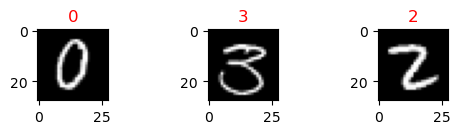

In [9]:
i = 0
positions = range(8)
for digit in positions:
    i += 2
    plt.subplot(1, len(positions)*2, i)
    plt.imshow(x_train[digit], cmap=plt.get_cmap('gray'))
    plt.title(y_train[digit], {'color': 'red'});

# Designing Neural Network Architecture¶


## Linear Model

In [10]:
model = keras.models.Sequential([keras.layers.Input(shape=(28,28,1)),
                                 keras.layers.Lambda(standardize),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=num_classes, activation='softmax')])

In [11]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(batches,
                    steps_per_epoch=batches.n,
                    epochs=10,
                    validation_data=val_batches,
                    validation_steps=val_batches.n)

Epoch 1/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 1s 15us/step - accuracy: 0.9304 - loss: 0.2531 - val_accuracy: 0.9179 - val_loss: 0.2943
Epoch 2/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 1s 14us/step - accuracy: 0.9310 - loss: 0.2504 - val_accuracy: 0.9171 - val_loss: 0.2932
Epoch 3/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 1s 15us/step - accuracy: 0.9315 - loss: 0.2482 - val_accuracy: 0.9176 - val_loss: 0.2957
Epoch 4/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 1s 14us/step - accuracy: 0.9312 - loss: 0.2473 - val_accuracy: 0.9140 - val_loss: 0.2998
Epoch 5/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 1s 14us/step - accuracy: 0.9316 - loss: 0.2472 - val_accuracy: 0.9098 - val_loss: 0.3129
Epoch 6/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 1s 14us/step - accuracy: 0.9331 - loss: 0.2456 - val_accuracy: 0.9148 - val_loss: 0.3006
Epoch 7/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 1s 14us/step - accuracy: 0.9329 - loss: 0.2441 - val_accuracy: 0.9131 - val_loss: 0.3068
Epoch 8/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 1s 14us/step - accuracy: 

## Fully Connected Model

In [14]:
model = keras.models.Sequential([keras.layers.Input(shape=(28,28,1)),
                                 keras.layers.Lambda(standardize),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=512, activation='relu'),
                                 keras.layers.Dense(units=num_classes, activation='softmax')])

In [15]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(batches,
                    steps_per_epoch=batches.n,
                    epochs=10,
                    validation_data=val_batches,
                    validation_steps=val_batches.n)

Epoch 1/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 2s 34us/step - accuracy: 0.9288 - loss: 0.2320 - val_accuracy: 0.9643 - val_loss: 0.1143
Epoch 2/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 1s 36us/step - accuracy: 0.9724 - loss: 0.0914 - val_accuracy: 0.9676 - val_loss: 0.1043
Epoch 3/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 1s 39us/step - accuracy: 0.9817 - loss: 0.0575 - val_accuracy: 0.9705 - val_loss: 0.0958
Epoch 4/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 1s 35us/step - accuracy: 0.9866 - loss: 0.0411 - val_accuracy: 0.9736 - val_loss: 0.0873
Epoch 5/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 1s 35us/step - accuracy: 0.9894 - loss: 0.0328 - val_accuracy: 0.9669 - val_loss: 0.1175
Epoch 6/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 1s 36us/step - accuracy: 0.9896 - loss: 0.0282 - val_accuracy: 0.9740 - val_loss: 0.0965
Epoch 7/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 1s 37us/step - accuracy: 0.9914 - loss: 0.0230 - val_accuracy: 0.9736 - val_loss: 0.1084
Epoch 8/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 1s 35us/step - accuracy: 

## Convolutional Neural Network

In [17]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28,28,1)),
    keras.layers.Lambda(standardize),
    keras.layers.Convolution2D(32,(3,3), activation='relu'),
    keras.layers.Convolution2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Convolution2D(32,(3,3), activation='relu'),
    keras.layers.Convolution2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.Dense(units=num_classes, activation='softmax')
])

In [18]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(batches,
                    steps_per_epoch=batches.n,
                    epochs=10,
                    validation_data=val_batches,
                    validation_steps=val_batches.n)

Epoch 1/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 11s 271us/step - accuracy: 0.9512 - loss: 0.1573 - val_accuracy: 0.9848 - val_loss: 0.0496
Epoch 2/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 11s 286us/step - accuracy: 0.9856 - loss: 0.0463 - val_accuracy: 0.9857 - val_loss: 0.0448
Epoch 3/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 11s 278us/step - accuracy: 0.9902 - loss: 0.0314 - val_accuracy: 0.9883 - val_loss: 0.0391
Epoch 4/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 11s 278us/step - accuracy: 0.9925 - loss: 0.0224 - val_accuracy: 0.9881 - val_loss: 0.0432
Epoch 5/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 10s 271us/step - accuracy: 0.9940 - loss: 0.0185 - val_accuracy: 0.9886 - val_loss: 0.0520
Epoch 6/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 10s 272us/step - accuracy: 0.9955 - loss: 0.0144 - val_accuracy: 0.9902 - val_loss: 0.0368
Epoch 7/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 10s 273us/step - accuracy: 0.9952 - loss: 0.0139 - val_accuracy: 0.9900 - val_loss: 0.0320
Epoch 8/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 11s 278us/s

## Data Augmentation

In [20]:
gen = keras.preprocessing.image.ImageDataGenerator(rotation_range=8, 
                        width_shift_range=0.08,
                        shear_range=0.3,
                        height_shift_range=0.08,
                        zoom_range=0.08)

batches = gen.flow(x_train_splited, y_train_categorical_splited, batch_size=64)

val_batches = gen.flow(x_val, y_val, batch_size=64)

In [21]:
model.optimizer.lr = 0.001

In [22]:
history = model.fit(batches,
                    steps_per_epoch=batches.n,
                    epochs=10,
                    validation_data=val_batches,
                    validation_steps=val_batches.n)

Epoch 1/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 10s 275us/step - accuracy: 0.9801 - loss: 0.0650 - val_accuracy: 0.9862 - val_loss: 0.0529
Epoch 2/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 11s 282us/step - accuracy: 0.9885 - loss: 0.0376 - val_accuracy: 0.9869 - val_loss: 0.0499
Epoch 3/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 10s 273us/step - accuracy: 0.9896 - loss: 0.0322 - val_accuracy: 0.9857 - val_loss: 0.0465
Epoch 4/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 10s 274us/step - accuracy: 0.9912 - loss: 0.0287 - val_accuracy: 0.9879 - val_loss: 0.0490
Epoch 5/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 10s 276us/step - accuracy: 0.9911 - loss: 0.0276 - val_accuracy: 0.9886 - val_loss: 0.0443
Epoch 6/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 10s 269us/step - accuracy: 0.9920 - loss: 0.0270 - val_accuracy: 0.9888 - val_loss: 0.0386
Epoch 7/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 10s 270us/step - accuracy: 0.9929 - loss: 0.0241 - val_accuracy: 0.9914 - val_loss: 0.0317
Epoch 8/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 10s 274us/s

## Adding Batch Normalization

In [23]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28,28,1)),
    keras.layers.Lambda(standardize),
    keras.layers.Convolution2D(32,(3,3), activation='relu'),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.Convolution2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.Convolution2D(32,(3,3), activation='relu'),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.Convolution2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.Dense(units=num_classes, activation='softmax')
])

In [24]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.optimizer.lr = 0.001

In [26]:
history = model.fit(batches,
                    steps_per_epoch=batches.n,
                    epochs=10,
                    validation_data=val_batches,
                    validation_steps=val_batches.n)

Epoch 1/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 18s 438us/step - accuracy: 0.9440 - loss: 0.1795 - val_accuracy: 0.9752 - val_loss: 0.0813
Epoch 2/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 18s 479us/step - accuracy: 0.9790 - loss: 0.0688 - val_accuracy: 0.9843 - val_loss: 0.0535
Epoch 3/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 18s 463us/step - accuracy: 0.9832 - loss: 0.0540 - val_accuracy: 0.9826 - val_loss: 0.0564
Epoch 4/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 18s 485us/step - accuracy: 0.9857 - loss: 0.0456 - val_accuracy: 0.9855 - val_loss: 0.0464
Epoch 5/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 18s 471us/step - accuracy: 0.9863 - loss: 0.0435 - val_accuracy: 0.9900 - val_loss: 0.0309
Epoch 6/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 18s 477us/step - accuracy: 0.9870 - loss: 0.0394 - val_accuracy: 0.9852 - val_loss: 0.0464
Epoch 7/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 19s 494us/step - accuracy: 0.9889 - loss: 0.0351 - val_accuracy: 0.9886 - val_loss: 0.0413
Epoch 8/10
37800/37800 ━━━━━━━━━━━━━━━━━━━━ 19s 493us/s

In [28]:
predictions = model.predict(x_test, verbose=0)

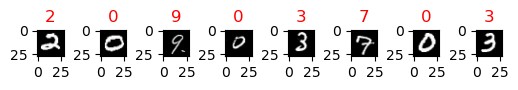

In [41]:
i = 0
positions = range(8)
for digit in positions:
    i += 2
    plt.subplot(1, len(positions)*2, i)
    plt.imshow(x_test[digit], cmap=plt.get_cmap('gray'))
    plt.title(np.argmax(predictions[digit]), {'color': 'red'});